# Data Communication and Computer Networking Project

- 2210511050 Adrian Fakhriza Hakim
- 2210511052 Widya Amellia Putri
- 2210511057 Nicolas Debrito 
- 2210511072 Edwina Martha Putri 

## Descriptive Analysis, Pattern Detection Analysis on DDoS Attacks through 2D Visualization

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import socket
import geopandas as gpd

### Create DataFrame

Create the DataFrame used by converting mergeWednesday.csv to DataFrame df

In [2]:
df = pd.read_csv('mergeWednesday.csv')

df.rename(columns={
    "No.": "Count_id"
}, inplace=True)

rounded_time = df["Time"].apply(lambda x: int(round(x)))
df["Time"] = rounded_time

df

,Count_id,Time,Source,Destination,Protocol,Length,Info
0,1,0,185.5.72.153,192.168.10.19,TLSv1.2,1514,Ignored Unknown Record
1,2,0,185.5.72.153,192.168.10.19,TLSv1.2,2962,Ignored Unknown Record
2,3,0,185.5.72.153,192.168.10.19,TLSv1.2,2962,Ignored Unknown Record
3,4,0,185.5.72.153,192.168.10.19,TLSv1.2,2962,Ignored Unknown Record
4,5,0,185.5.72.153,192.168.10.19,TLSv1.2,1514,Ignored Unknown Record
...,...,...,...,...,...,...,...
1999995,1999996,3644,192.168.10.5,192.168.10.3,DNS,86,Standard query 0x655a A secure-us.imrworldwide...
1999996,1999997,3644,192.168.10.3,192.168.10.1,DNS,97,Standard query 0xf000 A secure-us.imrworldwide...
1999997,1999998,3644,192.168.10.5,172.217.10.226,HTTP,822,GET /activeview?avi=Bg8vm6e5cWaqFNteIMK2qtcgJA...
1999998,1999999,3644,192.168.10.5,172.217.10.226,HTTP,787,GET /activeview?avi=BaIUq6e5cWauFNteIMK2qtcgJA...


Provides IP Version Information for each IP

In [3]:
def check_ip_version(address):
    if is_ipv4(address):
        return "IPv4"
    elif is_ipv6(address):
        return "IPv6"
    else:
        return "Bukan alamat IP valid"

def is_ipv4(address):
    try:
        socket.inet_pton(socket.AF_INET, address)
        return True
    except socket.error:
        return False

def is_ipv6(address):
    try:
        socket.inet_pton(socket.AF_INET6, address)
        return True
    except socket.error:
        return False

ip_address = df["Source"]
ip_version = []

for i in ip_address:
    ip_version.append(check_ip_version(i))

df["IP_Version"] = ip_version
df

,Count_id,Time,Source,Destination,Protocol,Length,Info,IP_Version
0,1,0,185.5.72.153,192.168.10.19,TLSv1.2,1514,Ignored Unknown Record,IPv4
1,2,0,185.5.72.153,192.168.10.19,TLSv1.2,2962,Ignored Unknown Record,IPv4
2,3,0,185.5.72.153,192.168.10.19,TLSv1.2,2962,Ignored Unknown Record,IPv4
3,4,0,185.5.72.153,192.168.10.19,TLSv1.2,2962,Ignored Unknown Record,IPv4
4,5,0,185.5.72.153,192.168.10.19,TLSv1.2,1514,Ignored Unknown Record,IPv4
...,...,...,...,...,...,...,...,...
1999995,1999996,3644,192.168.10.5,192.168.10.3,DNS,86,Standard query 0x655a A secure-us.imrworldwide...,IPv4
1999996,1999997,3644,192.168.10.3,192.168.10.1,DNS,97,Standard query 0xf000 A secure-us.imrworldwide...,IPv4
1999997,1999998,3644,192.168.10.5,172.217.10.226,HTTP,822,GET /activeview?avi=Bg8vm6e5cWaqFNteIMK2qtcgJA...,IPv4
1999998,1999999,3644,192.168.10.5,172.217.10.226,HTTP,787,GET /activeview?avi=BaIUq6e5cWauFNteIMK2qtcgJA...,IPv4


Perform IP Tracking using ipinfo.io

In [4]:
# ip_location = {
#     "IP": [],
#     "City":[],
#     "Region":[],
#     "Country":[],
#     "Coordinate": []}

# filter_df = df[df["IP_Version"] == "IPv4"]
# ip_complate = filter_df["Source"]
# ip_complate = ip_complate.drop_duplicates()

# loop = 0
# for ip in ip_complate:
#     try:

#         response = requests.get(f'https://ipinfo.io/{ip}/json')
#         data = response.json()
#         print(loop)
#         print(ip)

#         print(f"Location: {data.get('city', 'N/A')}, {data.get('region', 'N/A')}, {data.get('country', 'N/A')}")
#         print(f"Coordinates: {data.get('loc', 'N/A')}")
#         ip_location['IP'].append(ip)
#         ip_location['City'].append(data.get('city', 'N/A'))
#         ip_location['Region'].append(data.get('region', 'N/A'))
#         ip_location['Country'].append(data.get('country', 'N/A'))
#         ip_location['Coordinate'].append(data.get('loc', 'N/A'))
#     except:
#         pass

# geolocation = pd.DataFrame(ip_location)
# geolocation.to_csv("geolocation_data5.csv", index=False)

Create a new DataFrame that stores IP Latitude and Longitude information

In [5]:
geoanalisis_df = pd.read_csv('geolocation_data.csv')
geoanalisis_df

latitude_df = []
longitude_df = []

for coordinate in geoanalisis_df['Coordinate']:
    if pd.notna(coordinate):
        loc = str(coordinate).split(',')
        latitude_df.append(loc[0])
        longitude_df.append(loc[1])
    else:
        latitude_df.append(np.nan)
        longitude_df.append(np.nan)

geoanalisis_df['Latitude'] = latitude_df
geoanalisis_df['Longitude'] = longitude_df

geoanalisis_df.dropna()

,IP,City,Region,Country,Coordinate,Latitude,Longitude
0,185.5.72.153,Saint Petersburg,St.-Petersburg,RU,"59.9386,30.3141",59.9386,30.3141
2,185.5.72.155,Saint Petersburg,St.-Petersburg,RU,"59.9386,30.3141",59.9386,30.3141
3,185.5.72.33,Saint Petersburg,St.-Petersburg,RU,"59.9386,30.3141",59.9386,30.3141
4,185.5.74.27,Saint Petersburg,St.-Petersburg,RU,"59.9386,30.3141",59.9386,30.3141
7,23.15.4.18,Cambridge,Massachusetts,US,"42.3620,-71.0830",42.3620,-71.0830
...,...,...,...,...,...,...,...
2681,77.72.118.173,Duivendrecht,North Holland,NL,"52.3294,4.9396",52.3294,4.9396
2682,23.201.81.225,Chicago,Illinois,US,"41.8500,-87.6500",41.8500,-87.6500
2683,23.63.226.161,Toronto,Ontario,CA,"43.7064,-79.3986",43.7064,-79.3986
2684,46.236.9.36,Maidenhead,England,GB,"51.5228,-0.7199",51.5228,-0.7199


### Analaysis Data

#### Traffic Analisis

Most Requests from IP Source

In [6]:
source_df = df.groupby(by=["Source"]).agg({
    "Count_id": "count",
}).sort_values(by="Count_id", ascending=False)
source_df


,Count_id
Source,
172.16.0.1,668836
192.168.10.50,504983
192.168.10.15,95192
192.168.10.3,59544
192.168.10.12,48088
...,...
fe80::266e:96ff:fe4a:377a,1
192.0.79.32,1
54.247.121.208,1


C:\Users\nicol\AppData\Local\Temp\ipykernel_17940\475241099.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


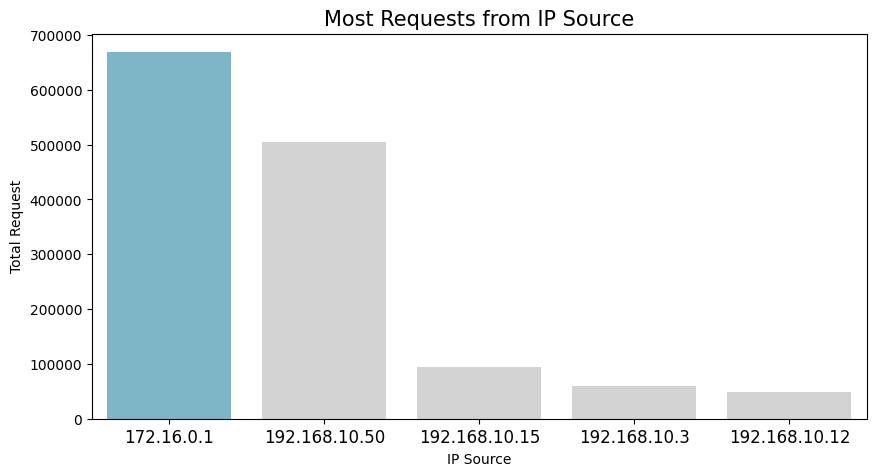

In [7]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

top_source_df = source_df.sort_values(by="Count_id", ascending=False)

sns.barplot(
    y="Count_id", 
    x="Source",
    data=top_source_df[:5].sort_values(by="Count_id", ascending=False),
    palette=colors
)

plt.title("Most Requests from IP Source", loc="center", fontsize=15)
plt.ylabel("Total Request")
plt.xlabel("IP Source")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Highest number of sent protocols

In [8]:
protocol_df = df.groupby(by=["Protocol"]).agg({
    "Count_id": "count"
}).sort_values(by="Count_id", ascending=False)
protocol_df

,Count_id
Protocol,
TCP,1525214
HTTP,168607
TLSv1.2,156593
DNS,111953
TLSv1,7682
ARP,5713
OCSP,4844
SSHv2,3105
DHCPv6,2678


C:\Users\nicol\AppData\Local\Temp\ipykernel_17940\2630364457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\nicol\AppData\Local\Temp\ipykernel_17940\2630364457.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


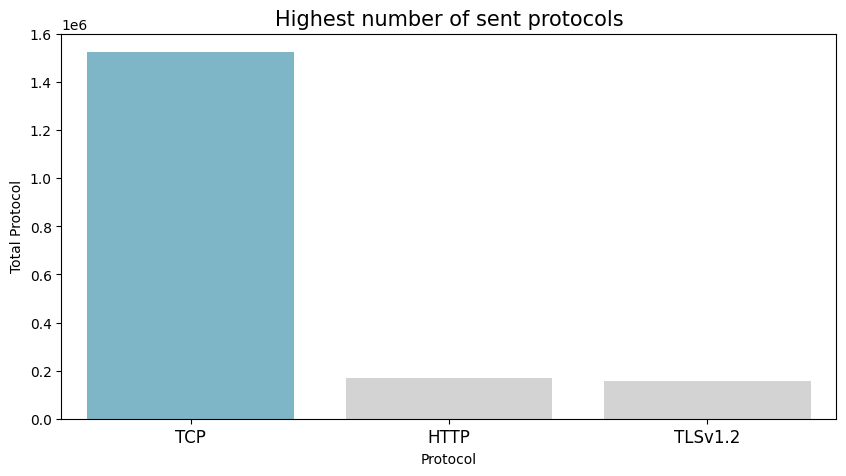

In [9]:
plt.figure(figsize=(10, 5))

top_protocol_df = protocol_df.sort_values(by="Count_id", ascending=False)

sns.barplot(
    y="Count_id", 
    x="Protocol",
    data=top_protocol_df[:3].sort_values(by="Count_id", ascending=False),
    palette=colors
)

plt.title("Highest number of sent protocols", loc="center", fontsize=15)
plt.ylabel("Total Protocol")
plt.xlabel("Protocol")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Number of requests per second

In [10]:
df["Time"] = pd.to_datetime(df["Time"], unit='s')
df = df.sort_values("Time")

per_second_df = df.groupby(by="Time").agg({
    "Count_id": "count"
}).sort_values(by="Time")
per_second_df

,Count_id
Time,
1970-01-01 00:00:00,674
1970-01-01 00:00:01,949
1970-01-01 00:00:02,367
1970-01-01 00:00:03,290
1970-01-01 00:00:04,153
...,...
1970-01-01 01:00:40,279
1970-01-01 01:00:41,453
1970-01-01 01:00:42,535


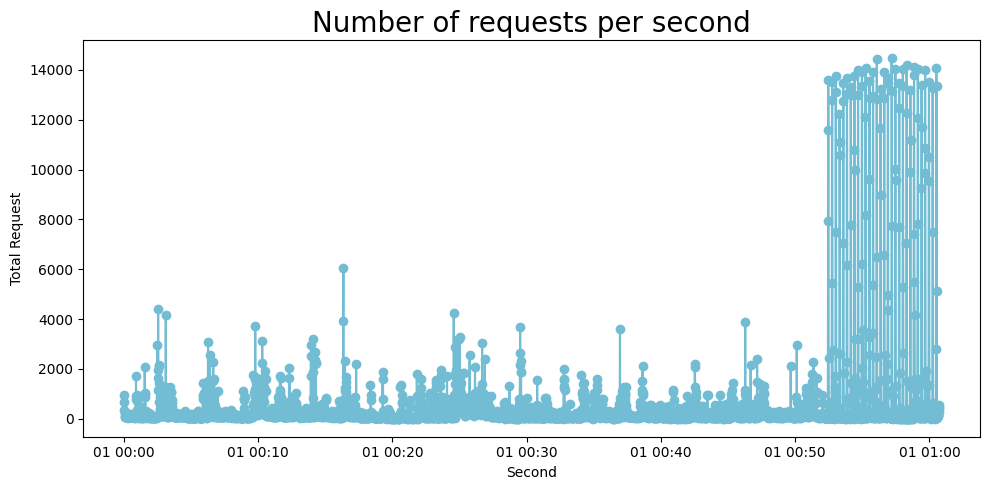

In [11]:
# Assuming df is your DataFrame
df["Time"] = pd.to_datetime(df["Time"], unit='s')
df = df.sort_values("Time")

per_second_df = df.groupby(by="Time").agg({
    "Count_id": "count"
}).sort_index()

plt.figure(figsize=(10, 5))
plt.plot_date(per_second_df.index, per_second_df["Count_id"], fmt='o-', color="#72BCD4")

plt.title("Number of requests per second", loc='center', fontsize=20)
plt.xlabel("Second")
plt.ylabel("Total Request")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Package Information Details

In [12]:
protokol_df = df.groupby(by=["Time","Source","Destination","Protocol","Length","Info"]).agg({
    "Count_id": "count"
})
protokol_df

Count_id
Time                Source         Destination   Protocol Length Info                                                        
1970-01-01 00:00:00 172.16.0.1     192.168.10.50 TCP      66     55120  >  80 [ACK] Seq=232 Ack=1 Win=229 Len=0 ...         1
                                                          74     55352  >  80 [SYN] Seq=0 Win=29200 Len=0 MSS=14...         1
                                                          297    54470  >  80 [PSH, ACK] Seq=1 Ack=1 Win=229 Len...         1
                                                                 54474  >  80 [PSH, ACK] Seq=1 Ack=1 Win=229 Len...         1
                                                                 54476  >  80 [PSH, ACK] Seq=1 Ack=1 Win=229 Len...         1
...                                                                                                                       ...
1970-01-01 01:00:44 69.172.216.111 192.168.10.5  TCP      60     80  >  51014 [RST] Seq=298 Win=0 Len=0                     1
                                                          66     80  >  51012 [SYN, ACK] Seq=0 Ack=1 Win=14600 L...         1
                                                                 80  >  51014 [SYN, ACK] Seq=0 Ack=1 Win=29200 L...         1
                                                                 80  >  51015 [SYN, ACK] Seq=0 Ack=1 Win=14600 L...         1
                                                                 80  >  51016 [SYN, ACK] Seq=0 Ack=1 Win=29200 L...         1

[1731409 rows x 1 columns]

#### Geo Analisis

Count the number of IP sources based on the location of the IP source city 

In [13]:
city_df = geoanalisis_df.groupby(by=['City', 'Region', 'Country']).agg({
    'IP': 'count'
}).sort_values(by='IP', ascending=False)
city_df

,,,IP
City,Region,Country,
Ashburn,Virginia,US,634
New York City,New York,US,181
San Francisco,California,US,157
Cambridge,Massachusetts,US,101
Tokyo,Tokyo,JP,98
...,...,...,...
Port Richmond,New York,US,1
Chula Vista,California,US,1
Châtillon,Île-de-France,FR,1


C:\Users\nicol\AppData\Local\Temp\ipykernel_17940\3168432154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


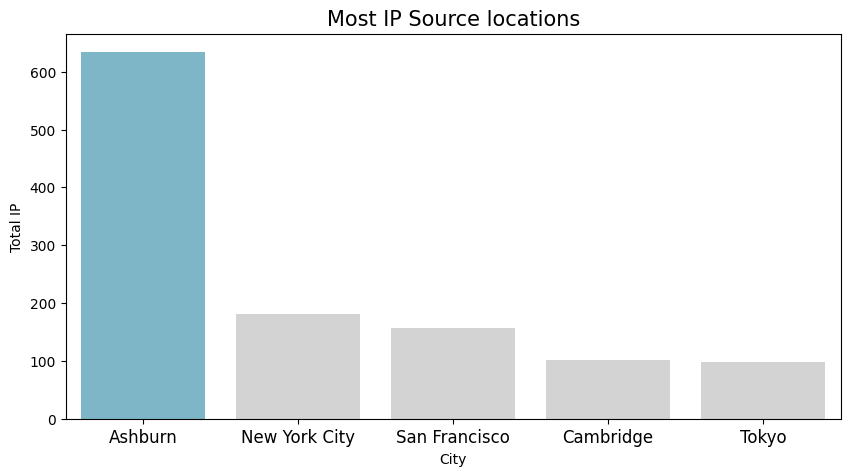

In [14]:
city_df.rename(columns={
    "IP": "Jumlah IP"
}, inplace=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sorted_city_df = city_df.sort_values(by="Jumlah IP", ascending=False)

sns.barplot(
    y="Jumlah IP", 
    x="City",
    data=sorted_city_df[:5],
    palette=colors
)

plt.title("Most IP Source locations", loc="center", fontsize=15)
plt.ylabel("Total IP")
plt.xlabel("City")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Melakukan pemetaan IP Source yang melakukan permintaan ke IP Destination dengan IPv4

C:\Users\nicol\AppData\Local\Temp\ipykernel_17940\1454679211.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


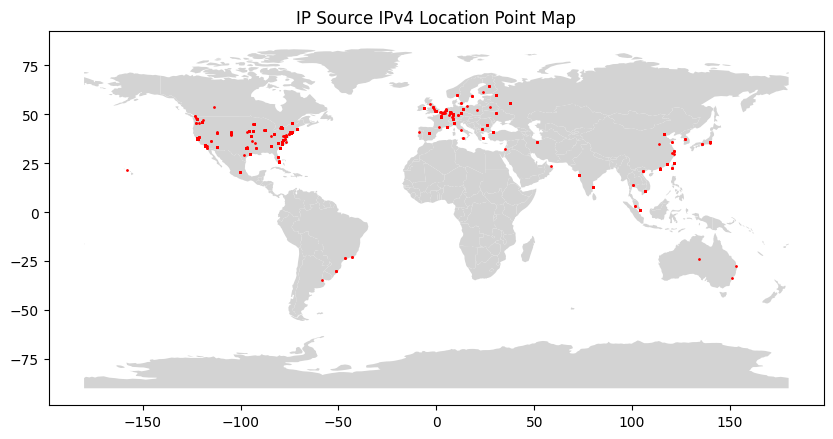

In [15]:
geometry = gpd.points_from_xy(geoanalisis_df['Longitude'], geoanalisis_df['Latitude'])
gdf = gpd.GeoDataFrame(geoanalisis_df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgrey')
gdf.plot(ax=ax, color='red', marker='o', markersize=1)
plt.title('IP Source IPv4 Location Point Map')
plt.show()